In [ ]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import BatchNormalization, Dropout
from keras.regularizers import l2
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

170498071/170498071 [==============================] - 11s 0us/step


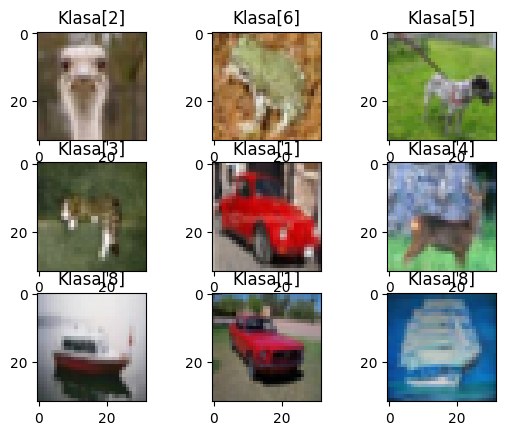

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in np.arange(9):
  random_index = np.random.randint(0, len(y_train))
  plt.subplot(330 + 1 + i)
  plt.imshow(X_train[random_index])
  plt.title("Klasa" + str(y_train[random_index]))

X_train = np.float32(X_train)/255.0
X_test = np.float32(X_test)/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

model.compile(optimizer=Adam(0.001),
               loss='SparseCategoricalCrossentropy',
               metrics='accuracy')

model.fit(x = X_train, y = y_train,
           epochs = 30,
           batch_size = 64,
           validation_data=(X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                   

KeyboardInterrupt: ignored

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3), kernel_regularizer=l2(0.001)))
model2.add(Conv2D(32, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model2.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model2.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model2.add(Dense(10, activation='softmax'))

In [ ]:
model2.summary()

model2.compile(optimizer=Adam(0.001),
               loss='SparseCategoricalCrossentropy',
               metrics='accuracy')

model2.fit(x = X_train, y = y_train,
           epochs = 20,
           batch_size = 64,
           validation_data=(X_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                 

In [ ]:
model3 = Sequential()

model3.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model3.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model3.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.3))

model3.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model3.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

In [ ]:
model3.summary()

model3.compile(optimizer=Adam(0.001),
               loss='SparseCategoricalCrossentropy',
               metrics='accuracy')

model3.fit(x = X_train, y = y_train,
           epochs = 20,
           batch_size = 64,
           validation_data=(X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [ ]:
model4 = Sequential()

model4.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model4.add(BatchNormalization())

model4.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.2))

model4.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model4.add(BatchNormalization())

model4.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.3))

model4.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model4.add(BatchNormalization())

model4.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.4))

model4.add(Flatten())

model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

In [ ]:
model4.summary()

model4.compile(optimizer=Adam(0.001),
               loss='SparseCategoricalCrossentropy',
               metrics='accuracy')

model4.fit(x = X_train, y = y_train,
           epochs = 20,
           batch_size = 64,
           validation_data=(X_test, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_19 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                      

In [ ]:
modelx = Sequential()

modelx.add(Conv2D(16, (3,3), activation='relu', padding='same', input_shape = (32,32,3)))
modelx.add(Conv2D(16, (3,3), activation='relu', padding='same'))
modelx.add(MaxPooling2D((2, 2)))

modelx.add(Conv2D(16, (3,3), activation='relu', padding='same'))
modelx.add(Conv2D(16, (3,3), activation='relu', padding='same'))
modelx.add(MaxPooling2D((2, 2)))

modelx.add(Conv2D(16, (3,3), activation='relu', padding='same'))
modelx.add(Conv2D(16, (3,3), activation='relu', padding='same'))
modelx.add(MaxPooling2D((2, 2)))

modelx.add(Flatten())
modelx.add(Dense(10, activation='softmax'))

In [ ]:
modelx.summary()

modelx.compile(optimizer=Adam(0.001),
               loss='SparseCategoricalCrossentropy',
               metrics='accuracy')

modelx.fit(x = X_train, y = y_train,
           epochs = 20,
           batch_size = 64,
           validation_data=(X_test, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 16)          0         
 ng2D)                                                

In [ ]:
modely = Sequential()

modely.add(Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
modely.add(BatchNormalization())

modely.add(Conv2D(16, (3,3), activation='relu', padding='same'))
modely.add(BatchNormalization())
modely.add(MaxPooling2D((2, 2)))
modely.add(Dropout(0.2))

modely.add(Conv2D(32, (3,3), activation='relu', padding='same'))
modely.add(BatchNormalization())

modely.add(Conv2D(32, (3,3), activation='relu', padding='same'))
modely.add(BatchNormalization())
modely.add(MaxPooling2D((2, 2)))
modely.add(Dropout(0.3))

modely.add(Conv2D(64, (3,3), activation='relu', padding='same'))
modely.add(BatchNormalization())

modely.add(Conv2D(64, (3,3), activation='relu', padding='same'))
modely.add(BatchNormalization())
modely.add(MaxPooling2D((2, 2)))
modely.add(Dropout(0.4))

modely.add(Flatten())
modely.add(Dense(10, activation='softmax'))

In [ ]:
modely.summary()

modely.compile(optimizer=Adam(0.001),
               loss='SparseCategoricalCrossentropy',
               metrics='accuracy')

modely.fit(x = X_train, y = y_train,
           epochs = 30,
           batch_size = 32,
           validation_data=(X_test, y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 batch_normalization_7 (Bat  (None, 32, 32, 16)        64        
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 16)        2320      
                                                                 
 batch_normalization_8 (Bat  (None, 32, 32, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                      

In [ ]:
modelz = Sequential()

modelz.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
modelz.add(BatchNormalization())
modelz.add(Conv2D(32, (3,3), activation='relu'))
modelz.add(BatchNormalization())
modelz.add(MaxPooling2D((2, 2), padding='valid'))
modelz.add(Dropout(0.2))

modelz.add(Conv2D(64, (3,3), activation='relu'))
modelz.add(BatchNormalization())
modelz.add(Conv2D(64, (3,3), activation='relu'))
modelz.add(BatchNormalization())
modelz.add(MaxPooling2D((2, 2)))
modelz.add(Dropout(0.3))

modelz.add(Flatten())
modelz.add(Dense(64, activation='relu'))
modelz.add(BatchNormalization())
modelz.add(Dropout(0.5))

modelz.add(Dense(10, activation='softmax'))

In [ ]:
modelz.summary()

modelz.compile(optimizer=Adam(0.003),
               loss='SparseCategoricalCrossentropy',
               metrics='accuracy')

modelz.fit(x = X_train, y = y_train,
           epochs = 30,
           batch_size = 32,
           validation_data=(X_test, y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_17 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_18 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                      

KeyboardInterrupt: ignored

In [ ]:
modelz = Sequential()

modelz.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
modelz.add(BatchNormalization())
modelz.add(Conv2D(32, (3,3), activation='relu'))
modelz.add(BatchNormalization())
modelz.add(MaxPooling2D((2, 2), padding='valid'))
modelz.add(Dropout(0.2))

modelz.add(Conv2D(64, (3,3), activation='relu'))
modelz.add(BatchNormalization())
modelz.add(Conv2D(64, (3,3), activation='relu'))
modelz.add(BatchNormalization())
modelz.add(MaxPooling2D((2, 2)))
modelz.add(Dropout(0.3))

modelz.add(Flatten())
modelz.add(Dense(64, activation='relu'))
modelz.add(BatchNormalization())
modelz.add(Dropout(0.4))

modelz.add(Dense(10, activation='softmax'))

In [ ]:
modelz.summary()

modelz.compile(optimizer=Adam(0.003),
               loss='SparseCategoricalCrossentropy',
               metrics='accuracy')

modelz.fit(x = X_train, y = y_train,
           epochs = 30,
           batch_size = 32,
           validation_data=(X_test, y_test))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_22 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_23 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                      

KeyboardInterrupt: ignored